<a href="https://colab.research.google.com/github/naimur-29/machine-learning/blob/main/pytorch/pytorch_crash_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Basics

In [2]:
import torch

In [3]:
x = torch.empty(2, 2, 2, 3)
x

tensor([[[[-6.9024e+12,  4.5772e-41,  0.0000e+00],
          [ 4.5773e-41, -6.5662e-31,  4.5773e-41]],

         [[ 5.7989e+26,  4.5773e-41,  5.3515e+26],
          [ 4.5773e-41,  5.6356e+26,  4.5773e-41]]],


        [[[ 5.6364e+26,  4.5773e-41,  4.2938e+24],
          [ 4.5773e-41,  5.7850e+26,  4.5773e-41]],

         [[-2.4400e-29,  4.5773e-41, -2.3792e-29],
          [ 4.5773e-41, -6.7510e-29,  4.5773e-41]]]])

In [4]:
torch.rand(2, 2)

tensor([[0.7356, 0.9251],
        [0.7574, 0.6509]])

In [5]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [6]:
torch.ones(4, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [7]:
x.dtype

torch.float32

In [8]:
x = torch.ones(3, 4, dtype=torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [9]:
x.shape, x.ndim

(torch.Size([3, 4]), 2)

In [10]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

x, y

(tensor([[0.6685, 0.0806],
         [0.6585, 0.5156]]), tensor([[0.6652, 0.5762],
         [0.4528, 0.7551]]))

In [11]:
z = x + y
z

tensor([[1.3338, 0.6568],
        [1.1112, 1.2707]])

In [12]:
y.add_(x)
y

tensor([[1.3338, 0.6568],
        [1.1112, 1.2707]])

In [13]:
torch.mul(x, y)

tensor([[0.8917, 0.0530],
        [0.7317, 0.6552]])

In [14]:
x, y, torch.div(x, y)

(tensor([[0.6685, 0.0806],
         [0.6585, 0.5156]]), tensor([[1.3338, 0.6568],
         [1.1112, 1.2707]]), tensor([[0.5012, 0.1228],
         [0.5926, 0.4058]]))

In [15]:
x[:, 0]

tensor([0.6685, 0.6585])

In [16]:
x = torch.rand(4, 4)
x

tensor([[0.2624, 0.2008, 0.6910, 0.0264],
        [0.7140, 0.7527, 0.3792, 0.0807],
        [0.3538, 0.6370, 0.0568, 0.9077],
        [0.1169, 0.7333, 0.5316, 0.3588]])

In [17]:
y = x.view(-1, 8)
y, y.size()

(tensor([[0.2624, 0.2008, 0.6910, 0.0264, 0.7140, 0.7527, 0.3792, 0.0807],
         [0.3538, 0.6370, 0.0568, 0.9077, 0.1169, 0.7333, 0.5316, 0.3588]]),
 torch.Size([2, 8]))

## Converting Numpy to Tensors

In [18]:
import numpy as np

In [19]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [20]:
b = a.numpy()
b, type(b)

(array([1., 1., 1., 1., 1.], dtype=float32), numpy.ndarray)

In [21]:
# same memory loaction:
a.mul_(10)
a, b

(tensor([10., 10., 10., 10., 10.]),
 array([10., 10., 10., 10., 10.], dtype=float32))

In [22]:
a = np.ones(5)
a, type(a)

(array([1., 1., 1., 1., 1.]), numpy.ndarray)

In [23]:
b = torch.from_numpy(a)
b, type(b)

(tensor([1., 1., 1., 1., 1.], dtype=torch.float64), torch.Tensor)

In [24]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device=device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y

z
# z = z.to("cpu")
# z.numpy()

tensor([[1.3338, 0.6568],
        [1.1112, 1.2707]])

In [25]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [26]:
x = torch.rand(5, requires_grad=True)
x

tensor([0.0205, 0.2780, 0.0760, 0.0818, 0.1757], requires_grad=True)

In [51]:
# Autograd
x = torch.randn(3, requires_grad=True)
x

tensor([-1.5433,  0.1096, -0.7666], requires_grad=True)

In [43]:
y = x + 2
y

tensor([2.4659, 2.3728, 1.1365], grad_fn=<AddBackward0>)

In [44]:
z = y*y*2
z

tensor([12.1618, 11.2606,  2.5834], grad_fn=<MulBackward0>)

In [46]:
# z = z.mean()
v = torch.tensor([0.1, 1, 0.001], dtype=torch.float32)

In [48]:
z.backward(v)
x.grad

tensor([9.8638e-01, 9.4913e+00, 4.5461e-03])

In [53]:
# x.requires_grad_(False)
# y = x.detach()
with torch.no_grad():
  y = x + 2

y

tensor([0.4567, 2.1096, 1.2334])

In [69]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [73]:
# Backward propogation:
# x = 1, y = 2, w = 1
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2
loss

tensor(1., grad_fn=<PowBackward0>)

In [74]:
# backward pass
loss.backward()
w.grad # then update weight & do next forward and backwards

tensor(-2.)

In [91]:
# manually logistic regression:
import numpy as np

# f = w * x
# f(y) = 2*x
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = x * 2

w = 0.0

In [92]:
# model prediction
def forward(x):
  return w * x

# loss = MSE(linear regression)
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

# gradient
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted - y).mean()

In [93]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(x)

  # loss
  l = loss(y, y_pred)

  # gradients
  dw = gradient(x, y, y_pred)

  # update weight
  w -= learning_rate * dw

  if epoch % 4 == 0:
    print(f'epoch {epoch + 1}: weight = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: weight = 1.200, loss = 30.00000000
epoch 5: weight = 1.980, loss = 0.01966083
epoch 9: weight = 1.999, loss = 0.00001288
epoch 13: weight = 2.000, loss = 0.00000001
epoch 17: weight = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [128]:
# with pytorch's power
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([5, 10, 15, 20], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

print(X, Y, w)

tensor([1., 2., 3., 4.]) tensor([ 5., 10., 15., 20.]) tensor(0., requires_grad=True)


In [129]:
print(f'Prediction before training: {forward(5):.3f}')
learning_rate = 0.01
iters = 100

for epoch in range(iters):
  # forward/prediction
  y_pred = forward(X)
  # loss calculation
  l = loss(Y, y_pred)
  # backward/gradient calc
  l.backward()

  # updating the weight/backpropogation
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero grad
  w.grad.zero_()

  if epoch % 20 == 0:
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction before training: {forward(5):.3f}')

Prediction before training: 0.000
epoch 1: w = 0.750, loss = 187.50000000
epoch 21: w = 4.835, loss = 0.28168115
epoch 41: w = 4.994, loss = 0.00042319
epoch 61: w = 5.000, loss = 0.00000063
epoch 81: w = 5.000, loss = 0.00000000
Prediction before training: 25.000


In [130]:
print(f'Prediction before training: {forward(50):.3f}')

Prediction before training: 250.000


## Training Pipeline Steps
1. Design Model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training Loop
  - forward pass: prediction
  - backward pass: gradient calc.
  - update weight

In [158]:
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4], [5]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10]], dtype=torch.float32)

X_test = torch.tensor([10], dtype=torch.float32)
n_samples, n_features = X.shape

print(X, Y, n_samples, n_features)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]]) tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]]) 5 1


In [207]:
input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

# custom model
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

In [209]:
print(f"Prediction before tarining: {model(X_test).item():.3f}")

learning_rate = 0.02
iters = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(iters):
  y_pred = model(X)
  l = loss(Y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 200 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch + 1}: w = {w[0, 0].item():.3f}, loss = {l:.8f}')

print(f"Prediction before tarining: {model(X_test).item():.3f}")

Prediction before tarining: 19.998
epoch 1: w = 2.000, loss = 0.00000022
epoch 201: w = 2.000, loss = 0.00000001
epoch 401: w = 2.000, loss = 0.00000000
epoch 601: w = 2.000, loss = 0.00000000
epoch 801: w = 2.000, loss = 0.00000000
Prediction before tarining: 20.000


## Linear Regression

In [211]:
import torch
import torch.nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Prepare data

In [219]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# print(X, Y, n_samples, n_features)

### Model

In [242]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

### loss and optimizer

In [243]:
learning_rate = 0.01
iters = 1000

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### training loop

epoch: 1, loss = 332.56756592
epoch: 201, loss = 332.56756592
epoch: 401, loss = 332.56756592
epoch: 601, loss = 332.56756592
epoch: 801, loss = 332.56756592


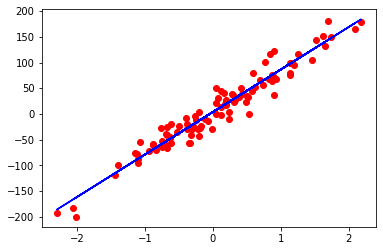

In [245]:
for epoch in range(iters):
  # forward pass 
  y_pred = model(X)
  loss = criterion(y_pred, Y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if epoch % 200 == 0:
    print(f"epoch: {epoch + 1}, loss = {loss.item():.8f}")

predicted = model(X).detach().numpy()

plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()